<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br> Parkinsons Telemonitoring <br><br> Machine Learning Project <br><br></p>

This Jupyter Notebook will utilize a Scikit Learn's Linear Regression Model and Decision Tree Regressor to model and evaluate Parkinson's disability ratings utilizing at home voice recordings from patients. 

Citation: 
A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

Import Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt 

Read in raw data using Pandas. Data sourced from UCI's Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring. 

In [2]:
data = pd.read_csv('/Users/husseinyelamin/desktop/ML_Parkinsons_Telemonitoring/parkinsons_updrs.data')

Let's read in the naming file to have a better grasp of the data. 

In [3]:
data1 = open('/Users/husseinyelamin/desktop/ML_Parkinsons_Telemonitoring/parkinsons_updrs.names', 'r')
datanames = data1.read()
print(datanames)

Parkinsons Telemonitoring Data Set  

Abstract: Oxford Parkinson's Disease Telemonitoring Dataset


Data Set Characteristics:  Multivariate
Attribute Characteristics:  Integer, Real
Associated Tasks:  Regression
Number of Instances:  5875
Number of Attributes:  26
Area:  Life
Date Donated:  2009-10-29


SOURCE:

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) 
and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in 
collaboration with 10 medical centers in the US and Intel Corporation who 
developed the telemonitoring device to record the speech signals. The 
original study used a range of linear and nonlinear regression methods to 
predict the clinician's Parkinson's disease symptom score on the UPDRS scale.



DATA SET INFORMATION:

This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progr

To better understand the data, here are some definitions: 

RPDE - Recurrence period density entropy - A mathematical measure of variation which is useful in speech analysis for parkinsons. <br><br>
UPDRS - Unified Parkinsons Disease Rating Scale - A scale for physician's to rate the severity of a patient's Parkinson's progression including input from motor function, mentation, mood etc. <br><br>
NHR - Noise to Harmonic Ratio - A mathematical method to measure horseness. <br><br>
HNR - Harmonics to Noise Ratio - A mathematical method to measure horseness. <br><br>
Shimmer - Measures of variation in the amplitude. <br><br>
Jitter - Measures of variation in fundamental frequency. 

Now let's begin to explore our dataset. 

In [4]:
data.shape, data

((5875, 22),
       subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
 0            1   72    0     5.6431       28.199       34.398    0.00662   
 1            1   72    0    12.6660       28.447       34.894    0.00300   
 2            1   72    0    19.6810       28.695       35.389    0.00481   
 3            1   72    0    25.6470       28.905       35.810    0.00528   
 4            1   72    0    33.6420       29.187       36.375    0.00335   
 ...        ...  ...  ...        ...          ...          ...        ...   
 5870        42   61    0   142.7900       22.485       33.485    0.00406   
 5871        42   61    0   149.8400       21.988       32.988    0.00297   
 5872        42   61    0   156.8200       21.495       32.495    0.00349   
 5873        42   61    0   163.7300       21.007       32.007    0.00281   
 5874        42   61    0   170.7300       20.513       31.513    0.00282   
 
       Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Our data is not missing any values, and the data has been read in as the correct data type. 

In [6]:
data.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
min       7.000000     0.000830     0.000002     0.000330     0.000430  ...   
25%      21.371000     0.003580     0.000022     0.001580     0.001820  ...   
50%      27.576000     0.004900     0.000035     0.002250     0.002490  ...   
75%      36.399000     0.006800     0.000053     0.003290     0.003460  ...   
max      54.992000     0.099990     0.000446     0.057540     0.069560  ...   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5875.000000   5875.000000   5875.000000    5875.000000  5875.000000   
mean      0.310960      0.017156      0.020144       0.027481     0.051467   
std       0.230254      0.013237      0.016664       0.019986     0.039711   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.175000      0.009280      0.010790       0.015665     0.027830   
50%       0.253000      0.013700      0.015940       0.022710     0.041110   
75%       0.365000      0.020575      0.023755       0.032715     0.061735   
max       2.107000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.032120    21.679495     0.541473     0.653240     0.219589  
std       0.059692     4.291096     0.100986     0.070902     0.091498  
min       0.000286     1.659000     0.151020     0.514040     0.021983  
25%       0.010955    19.406000     0.469785     0.596180     0.156340  
50%       0.018448    21.920000     0.542250     0.643600     0.205500  
75%       0.031463    24.444000     0.614045     0.711335     0.264490  
max       0.748260    37.875000     0.966080     0.865600     0.731730  

[8 rows x 22 columns]

Now let's try and see if any clear correlations or relationships exist between the data.

In [7]:
print(data.corr())

               subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000 -0.030864  0.286851  -0.000882     0.252919   
age           -0.030864  1.000000 -0.041602   0.019884     0.273665   
sex            0.286851 -0.041602  1.000000  -0.009805    -0.031205   
test_time     -0.000882  0.019884 -0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665 -0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290 -0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422  -0.022837     0.084816   
Jitter(Abs)    0.075156  0.035691 -0.154645  -0.011365     0.050903   
Jitter:RAP     0.120339  0.010255  0.076718  -0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995  -0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703  -0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736  -0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481  -0.030962     0.110076   
Shimme

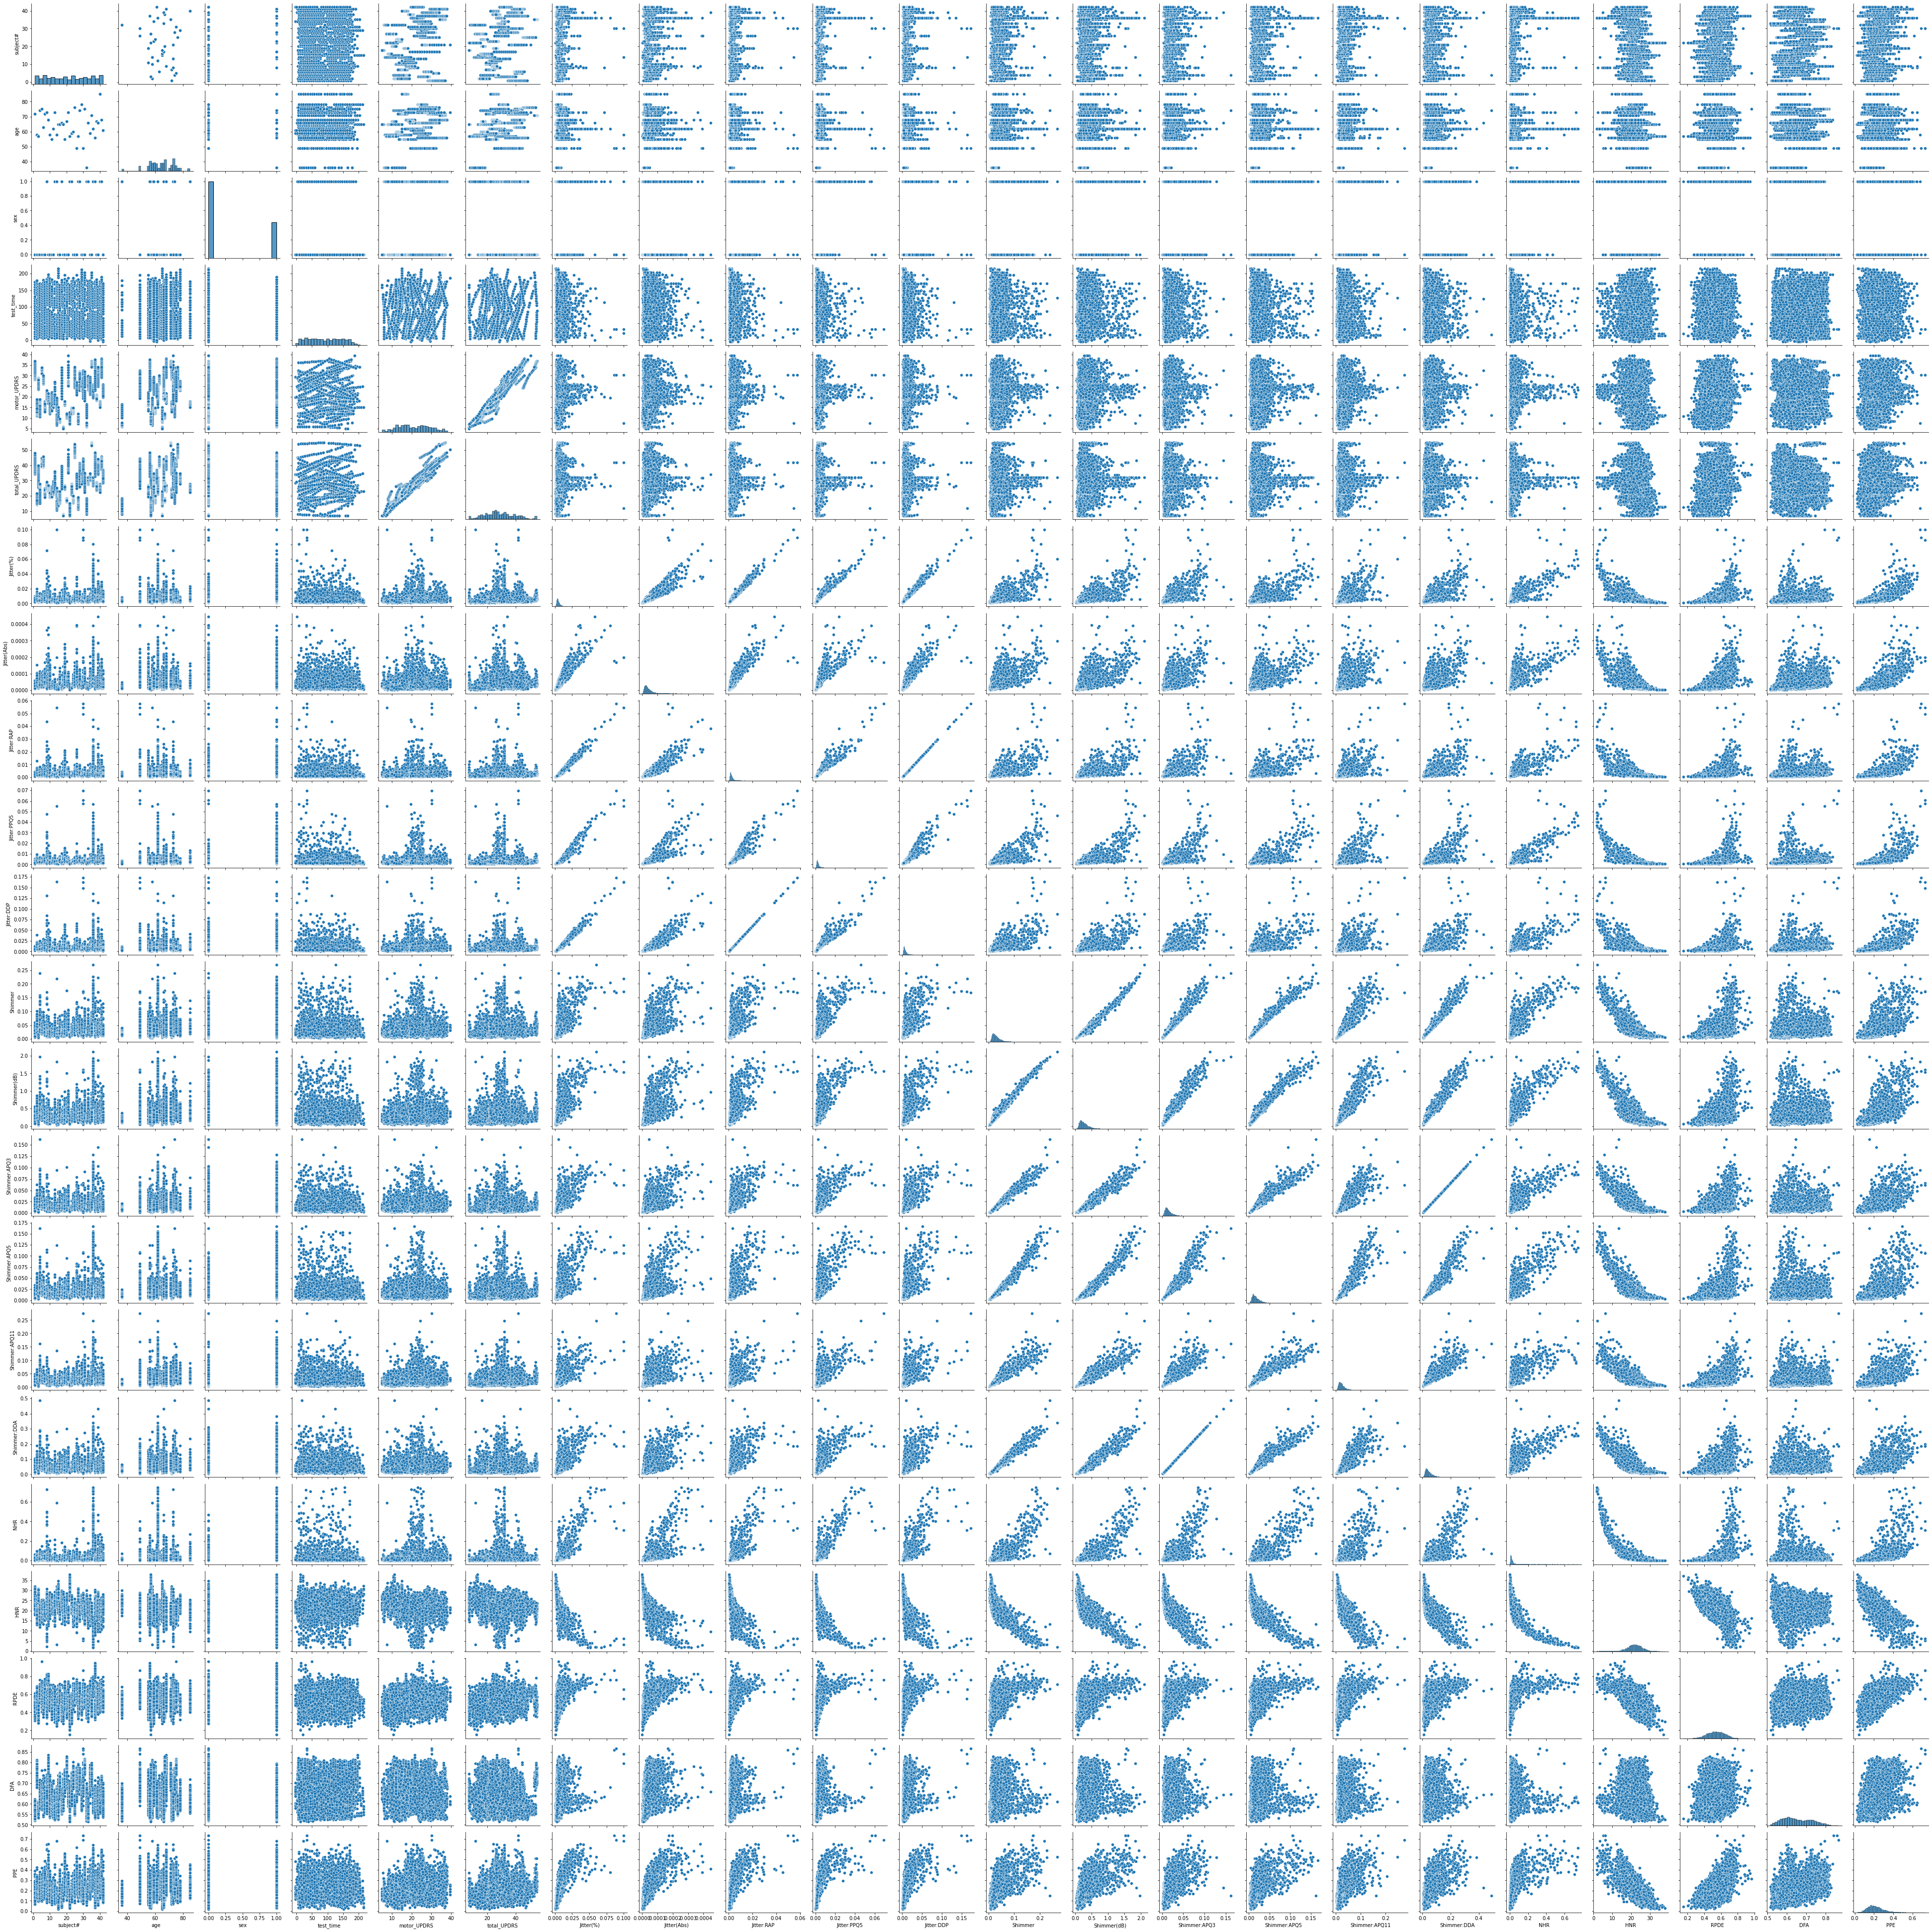

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

Now that we have explored the data, let's begin working on our model. 

In [28]:
features = ['age', 'sex', 'test_time','Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

In [29]:
target = ['motor_UPDRS', 'total_UPDRS']

In [30]:
X = data[features]

In [31]:
Y = data[target]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [35]:
Y_prediction = regressor.predict(X_test)
Y_prediction

array([[22.73285185, 31.41519568],
       [16.89219504, 21.45595042],
       [24.85510872, 34.54058655],
       ...,
       [23.16043051, 31.5734881 ],
       [24.97533454, 35.67266126],
       [21.73694069, 29.46233583]])

In [36]:
RMSE1 = sqrt(mean_squared_error(y_true = Y_test, y_pred = Y_prediction))
print(RMSE1)

8.71938119769041


Standalone RMSE values mean nearly nothing without standardization, so let's do that. 

In [50]:
SRMSE1 = (RMSE1 / (data['total_UPDRS'].max() - data['total_UPDRS'].min()))
print(SRMSE1)

0.18168405562782153


In [49]:
Y_test.describe()

motor_UPDRS  total_UPDRS
count  1939.000000  1939.000000
mean     21.387518    29.151321
std       8.212145    10.819660
min       5.037800     7.000000
25%      14.723000    21.185500
50%      21.232000    27.630000
75%      27.740000    36.946000
max      39.511000    54.992000

<p style="font-family: Arial; font-size:2em;color:purple; font-style:bold"><br> Let's try a different algorithm <br><br></p>

In [44]:
regressor = DecisionTreeRegressor(max_depth=30)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=30)

In [45]:
Y_prediction = regressor.predict(X_test)
Y_prediction

array([[24.11  , 29.554 ],
       [ 6.9987, 11.496 ],
       [16.416 , 23.099 ],
       ...,
       [31.622 , 39.735 ],
       [33.334 , 53.167 ],
       [36.471 , 54.471 ]])

In [46]:
Y_test.describe()

motor_UPDRS  total_UPDRS
count  1939.000000  1939.000000
mean     21.387518    29.151321
std       8.212145    10.819660
min       5.037800     7.000000
25%      14.723000    21.185500
50%      21.232000    27.630000
75%      27.740000    36.946000
max      39.511000    54.992000

In [47]:
RMSE2 = sqrt(mean_squared_error(y_true = Y_test, y_pred = Y_prediction))

In [48]:
print(RMSE2)

2.4120919442432633


In [51]:
SRMSE2 = (RMSE2 / (data['total_UPDRS'].max() - data['total_UPDRS'].min()))
print(SRMSE2)

0.05026029222043806
